In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

# Read in the Data
data = pd.read_csv("soccer21-22.csv")
data.head()

Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  13/08/2021   Brentford         Arsenal     2     0   H     1     0   H   
1  14/08/2021  Man United           Leeds     5     1   H     1     0   H   
2  14/08/2021     Burnley        Brighton     1     2   A     1     0   H   
3  14/08/2021     Chelsea  Crystal Palace     3     0   H     2     0   H   
4  14/08/2021     Everton     Southampton     3     1   H     0     1   A   

     Referee  ...  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0   M Oliver  ...    3    4  12   8   2   5   0   0   0   0  
1  P Tierney  ...    8    3  11   9   5   4   1   2   0   0  
2    D Coote  ...    3    8  10   7   7   6   2   1   0   0  
3     J Moss  ...    6    1  15  11   5   2   0   0   0   0  
4   A Madley  ...    6    3  13  15   6   8   2   0   0   0  

[5 rows x 22 columns]

In [8]:
# see all columns
pd.set_option('display.max_columns', None)
data.head()

Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  13/08/2021   Brentford         Arsenal     2     0   H     1     0   H   
1  14/08/2021  Man United           Leeds     5     1   H     1     0   H   
2  14/08/2021     Burnley        Brighton     1     2   A     1     0   H   
3  14/08/2021     Chelsea  Crystal Palace     3     0   H     2     0   H   
4  14/08/2021     Everton     Southampton     3     1   H     0     1   A   

     Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0   M Oliver   8  22    3    4  12   8   2   5   0   0   0   0  
1  P Tierney  16  10    8    3  11   9   5   4   1   2   0   0  
2    D Coote  14  14    3    8  10   7   7   6   2   1   0   0  
3     J Moss  13   4    6    1  15  11   5   2   0   0   0   0  
4   A Madley  14   6    6    3  13  15   6   8   2   0   0   0

In [2]:
# Check for info to understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null    int64 
 21  AR        380 no

In [4]:
data.describe().T

count       mean       std  min  25%   50%    75%   max
FTHG  380.0   1.513158  1.326545  0.0  1.0   1.0   2.00   7.0
FTAG  380.0   1.305263  1.258836  0.0  0.0   1.0   2.00   6.0
HTHG  380.0   0.681579  0.832187  0.0  0.0   0.0   1.00   4.0
HTAG  380.0   0.589474  0.808853  0.0  0.0   0.0   1.00   4.0
HS    380.0  13.847368  5.661784  3.0  9.0  13.5  17.00  31.0
AS    380.0  11.736842  5.348460  1.0  8.0  11.0  15.00  31.0
HST   380.0   4.678947  2.600402  0.0  3.0   4.0   6.00  15.0
AST   380.0   4.142105  2.589978  0.0  2.0   4.0   6.00  14.0
HF    380.0  10.055263  3.444180  1.0  8.0  10.0  12.00  22.0
AF    380.0  10.157895  3.718501  2.0  7.0  10.0  12.25  25.0
HC    380.0   5.602632  3.029755  0.0  3.0   5.0   7.00  15.0
AC    380.0   4.821053  2.735399  0.0  3.0   5.0   7.00  13.0
HY    380.0   1.652632  1.258373  0.0  1.0   1.5   2.00   6.0
AY    380.0   1.744737  1.230912  0.0  1.0   2.0   3.00   5.0
HR    380.0   0.050000  0.230005  0.0  0.0   0.0   0.00   2.0
AR    380.0   0.063158  0.243567  0.0  0.0   0.0   0.00   1.0

In [5]:
# check for null values
data.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [6]:
# we dont have any null values so we can proceed further
# check for duplicate values
data.duplicated().sum()

0

In [7]:
# we also dont have any duplicate values


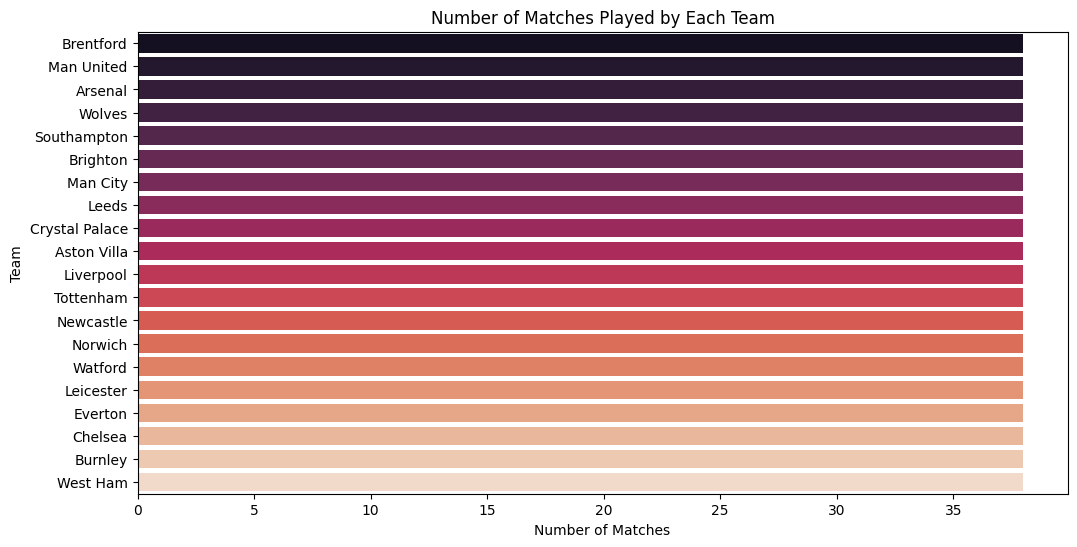

In [9]:
# Data Visualization
# Bar plot to show the number of matches played by each team
team_counts = pd.concat([data['HomeTeam'], data['AwayTeam']]).value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=team_counts.values, y=team_counts.index, palette='rocket')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()


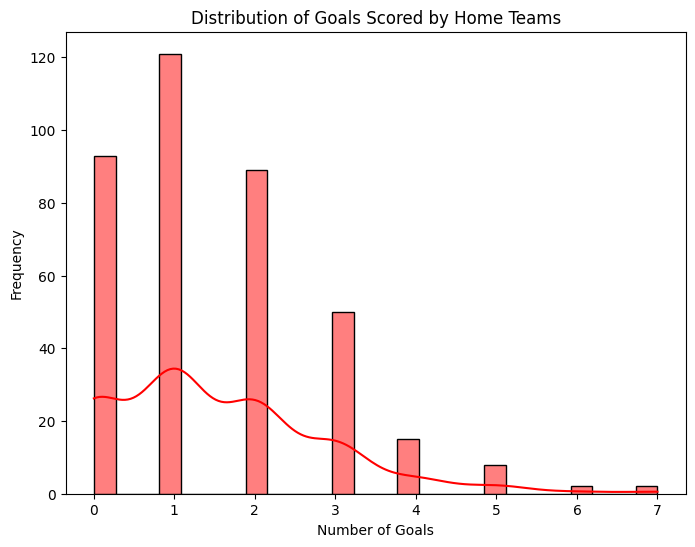

In [10]:
# Histogram to show the distribution of goals scored by the home team
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='FTHG', kde=True, color='red')
plt.title('Distribution of Goals Scored by Home Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.show()


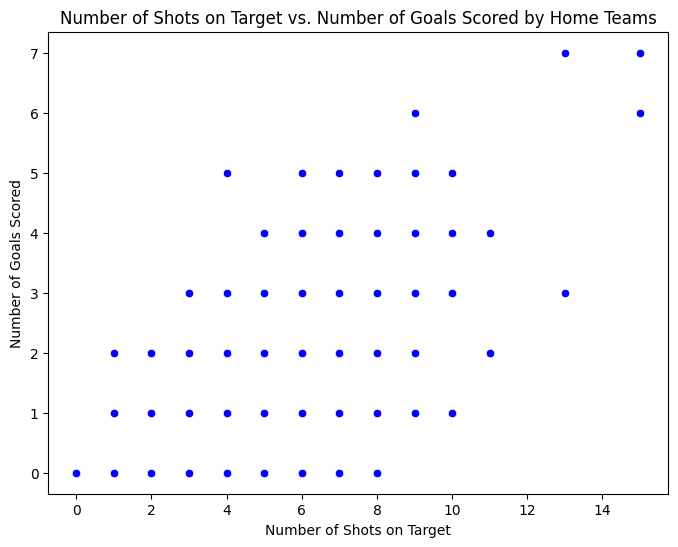

In [11]:
# Scatter plot to show the relationship between the number of shots on target and the number of goals scored by the home team
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='HST', y='FTHG', color='blue')
plt.title('Number of Shots on Target vs. Number of Goals Scored by Home Teams')
plt.xlabel('Number of Shots on Target')
plt.ylabel('Number of Goals Scored')
plt.show()


C:\Users\JINEF\AppData\Local\Temp\ipykernel_18120\375702312.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


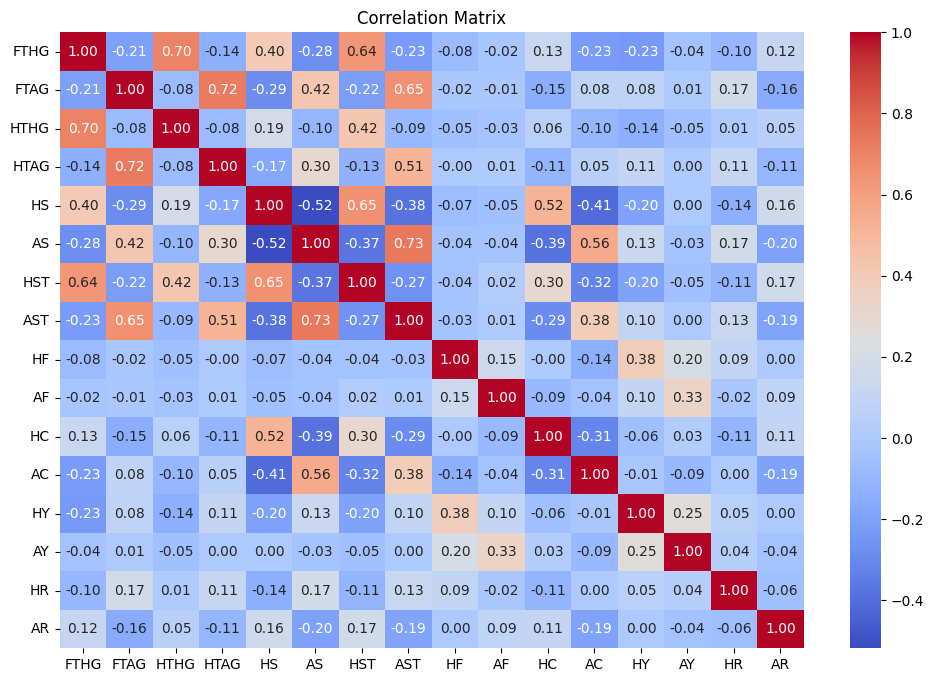

In [12]:
# correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
data.head()

Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  13/08/2021   Brentford         Arsenal     2     0   H     1     0   H   
1  14/08/2021  Man United           Leeds     5     1   H     1     0   H   
2  14/08/2021     Burnley        Brighton     1     2   A     1     0   H   
3  14/08/2021     Chelsea  Crystal Palace     3     0   H     2     0   H   
4  14/08/2021     Everton     Southampton     3     1   H     0     1   A   

     Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0   M Oliver   8  22    3    4  12   8   2   5   0   0   0   0  
1  P Tierney  16  10    8    3  11   9   5   4   1   2   0   0  
2    D Coote  14  14    3    8  10   7   7   6   2   1   0   0  
3     J Moss  13   4    6    1  15  11   5   2   0   0   0   0  
4   A Madley  14   6    6    3  13  15   6   8   2   0   0   0

In [14]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.head()

Date    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0 2021-08-13   Brentford         Arsenal     2     0   H     1     0   H   
1 2021-08-14  Man United           Leeds     5     1   H     1     0   H   
2 2021-08-14     Burnley        Brighton     1     2   A     1     0   H   
3 2021-08-14     Chelsea  Crystal Palace     3     0   H     2     0   H   
4 2021-08-14     Everton     Southampton     3     1   H     0     1   A   

     Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0   M Oliver   8  22    3    4  12   8   2   5   0   0   0   0  
1  P Tierney  16  10    8    3  11   9   5   4   1   2   0   0  
2    D Coote  14  14    3    8  10   7   7   6   2   1   0   0  
3     J Moss  13   4    6    1  15  11   5   2   0   0   0   0  
4   A Madley  14   6    6    3  13  15   6   8   2   0   0   0

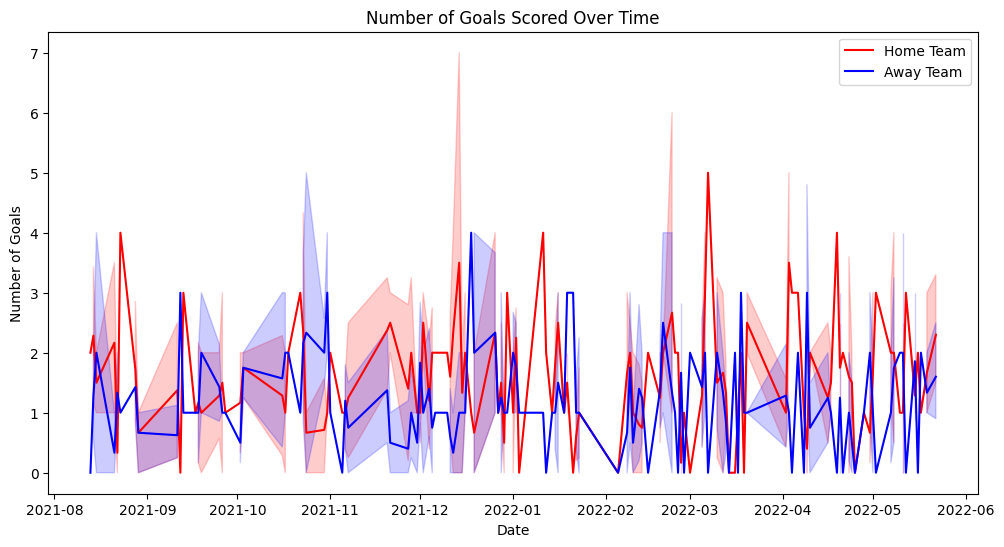

In [15]:
# Line plot to show the number of goals scored by the home and away teams over time
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='FTHG', color='red', label='Home Team')
sns.lineplot(data=data, x='Date', y='FTAG', color='blue', label='Away Team')
plt.title('Number of Goals Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.legend()
plt.show()


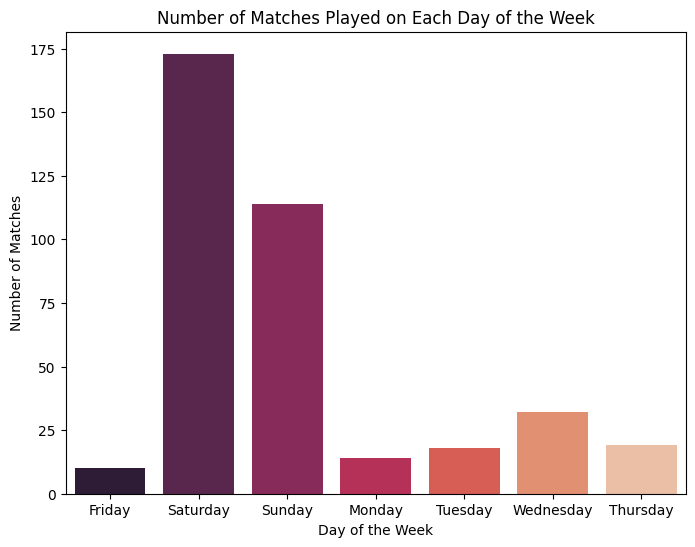

In [16]:
# Bar plot to show the number of matches played on each day of the week
data['DayOfWeek'] = data['Date'].dt.day_name()
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='DayOfWeek', palette='rocket')
plt.title('Number of Matches Played on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Matches')
plt.show()


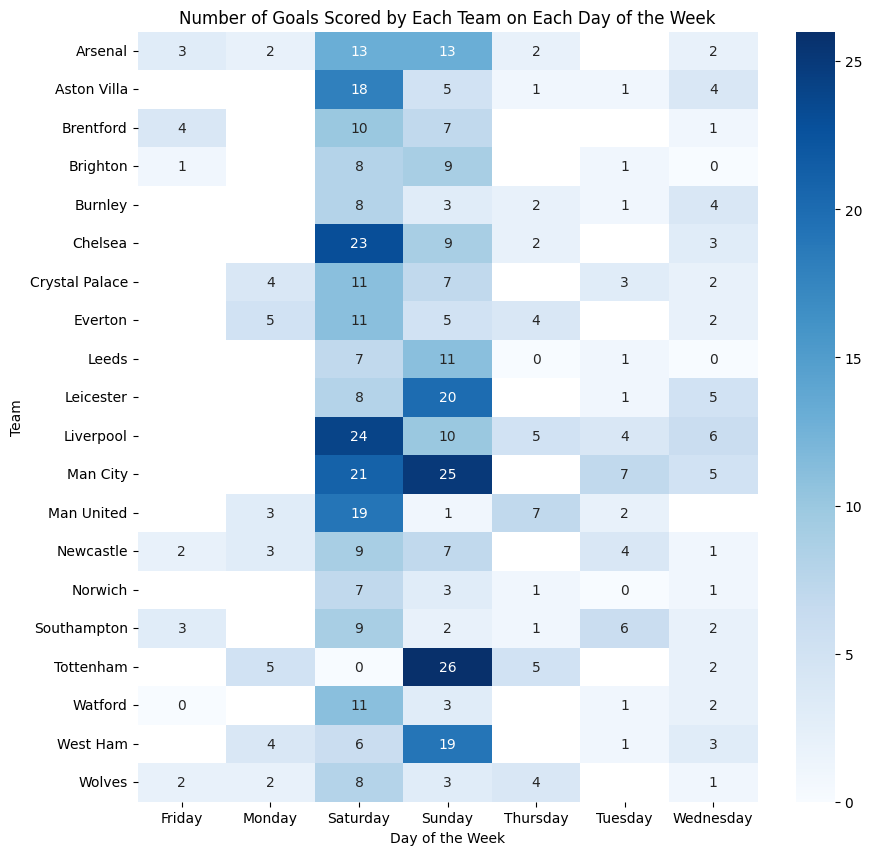

In [17]:
# Heatmap to show the number of goals scored by each team on each day of the week
team_day_counts = data.pivot_table(index='HomeTeam', columns='DayOfWeek', values='FTHG', aggfunc='sum')
plt.figure(figsize=(10,10))
sns.heatmap(team_day_counts, cmap='Blues', annot=True, fmt='.0f')
plt.title('Number of Goals Scored by Each Team on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Team')
plt.show()


In [18]:
# Basic data cleaning and preprocessing

# Drop 'Date' and 'Referee' columns if they exist
data.drop('Date', axis=1, inplace=True)
data.drop('Referee', axis=1, inplace=True)

In [19]:
data.head()

HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  \
0   Brentford         Arsenal     2     0   H     1     0   H   8  22    3   
1  Man United           Leeds     5     1   H     1     0   H  16  10    8   
2     Burnley        Brighton     1     2   A     1     0   H  14  14    3   
3     Chelsea  Crystal Palace     3     0   H     2     0   H  13   4    6   
4     Everton     Southampton     3     1   H     0     1   A  14   6    6   

   AST  HF  AF  HC  AC  HY  AY  HR  AR DayOfWeek  
0    4  12   8   2   5   0   0   0   0    Friday  
1    3  11   9   5   4   1   2   0   0  Saturday  
2    8  10   7   7   6   2   1   0   0  Saturday  
3    1  15  11   5   2   0   0   0   0  Saturday  
4    3  13  15   6   8   2   0   0   0  Saturday

In [20]:
# Convert categorical variables into numerical variables
le_teams = LabelEncoder()
le_results = LabelEncoder()
data['HomeTeam'] = le_teams.fit_transform(data['HomeTeam'])
data['AwayTeam'] = le_teams.transform(data['AwayTeam'])
data['HTR'] = le_results.fit_transform(data['HTR'])
data['FTR'] = le_results.transform(data['FTR'])
data.head()

HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  HS  AS  HST  AST  HF  \
0         2         0     2     0    2     1     0    2   8  22    3    4  12   
1        12         8     5     1    2     1     0    2  16  10    8    3  11   
2         4         3     1     2    0     1     0    2  14  14    3    8  10   
3         5         6     3     0    2     2     0    2  13   4    6    1  15   
4         7        15     3     1    2     0     1    0  14   6    6    3  13   

   AF  HC  AC  HY  AY  HR  AR DayOfWeek  
0   8   2   5   0   0   0   0    Friday  
1   9   5   4   1   2   0   0  Saturday  
2   7   7   6   2   1   0   0  Saturday  
3  11   5   2   0   0   0   0  Saturday  
4  15   6   8   2   0   0   0  Saturday

In [21]:
# remove DayOfWeek column
data.drop('DayOfWeek', axis=1, inplace=True)
data.head()

HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  HS  AS  HST  AST  HF  \
0         2         0     2     0    2     1     0    2   8  22    3    4  12   
1        12         8     5     1    2     1     0    2  16  10    8    3  11   
2         4         3     1     2    0     1     0    2  14  14    3    8  10   
3         5         6     3     0    2     2     0    2  13   4    6    1  15   
4         7        15     3     1    2     0     1    0  14   6    6    3  13   

   AF  HC  AC  HY  AY  HR  AR  
0   8   2   5   0   0   0   0  
1   9   5   4   1   2   0   0  
2   7   7   6   2   1   0   0  
3  11   5   2   0   0   0   0  
4  15   6   8   2   0   0   0

In [22]:
# Remove possible outliers
data = data[data['HS'] < 40]
data = data[data['AS'] < 40]

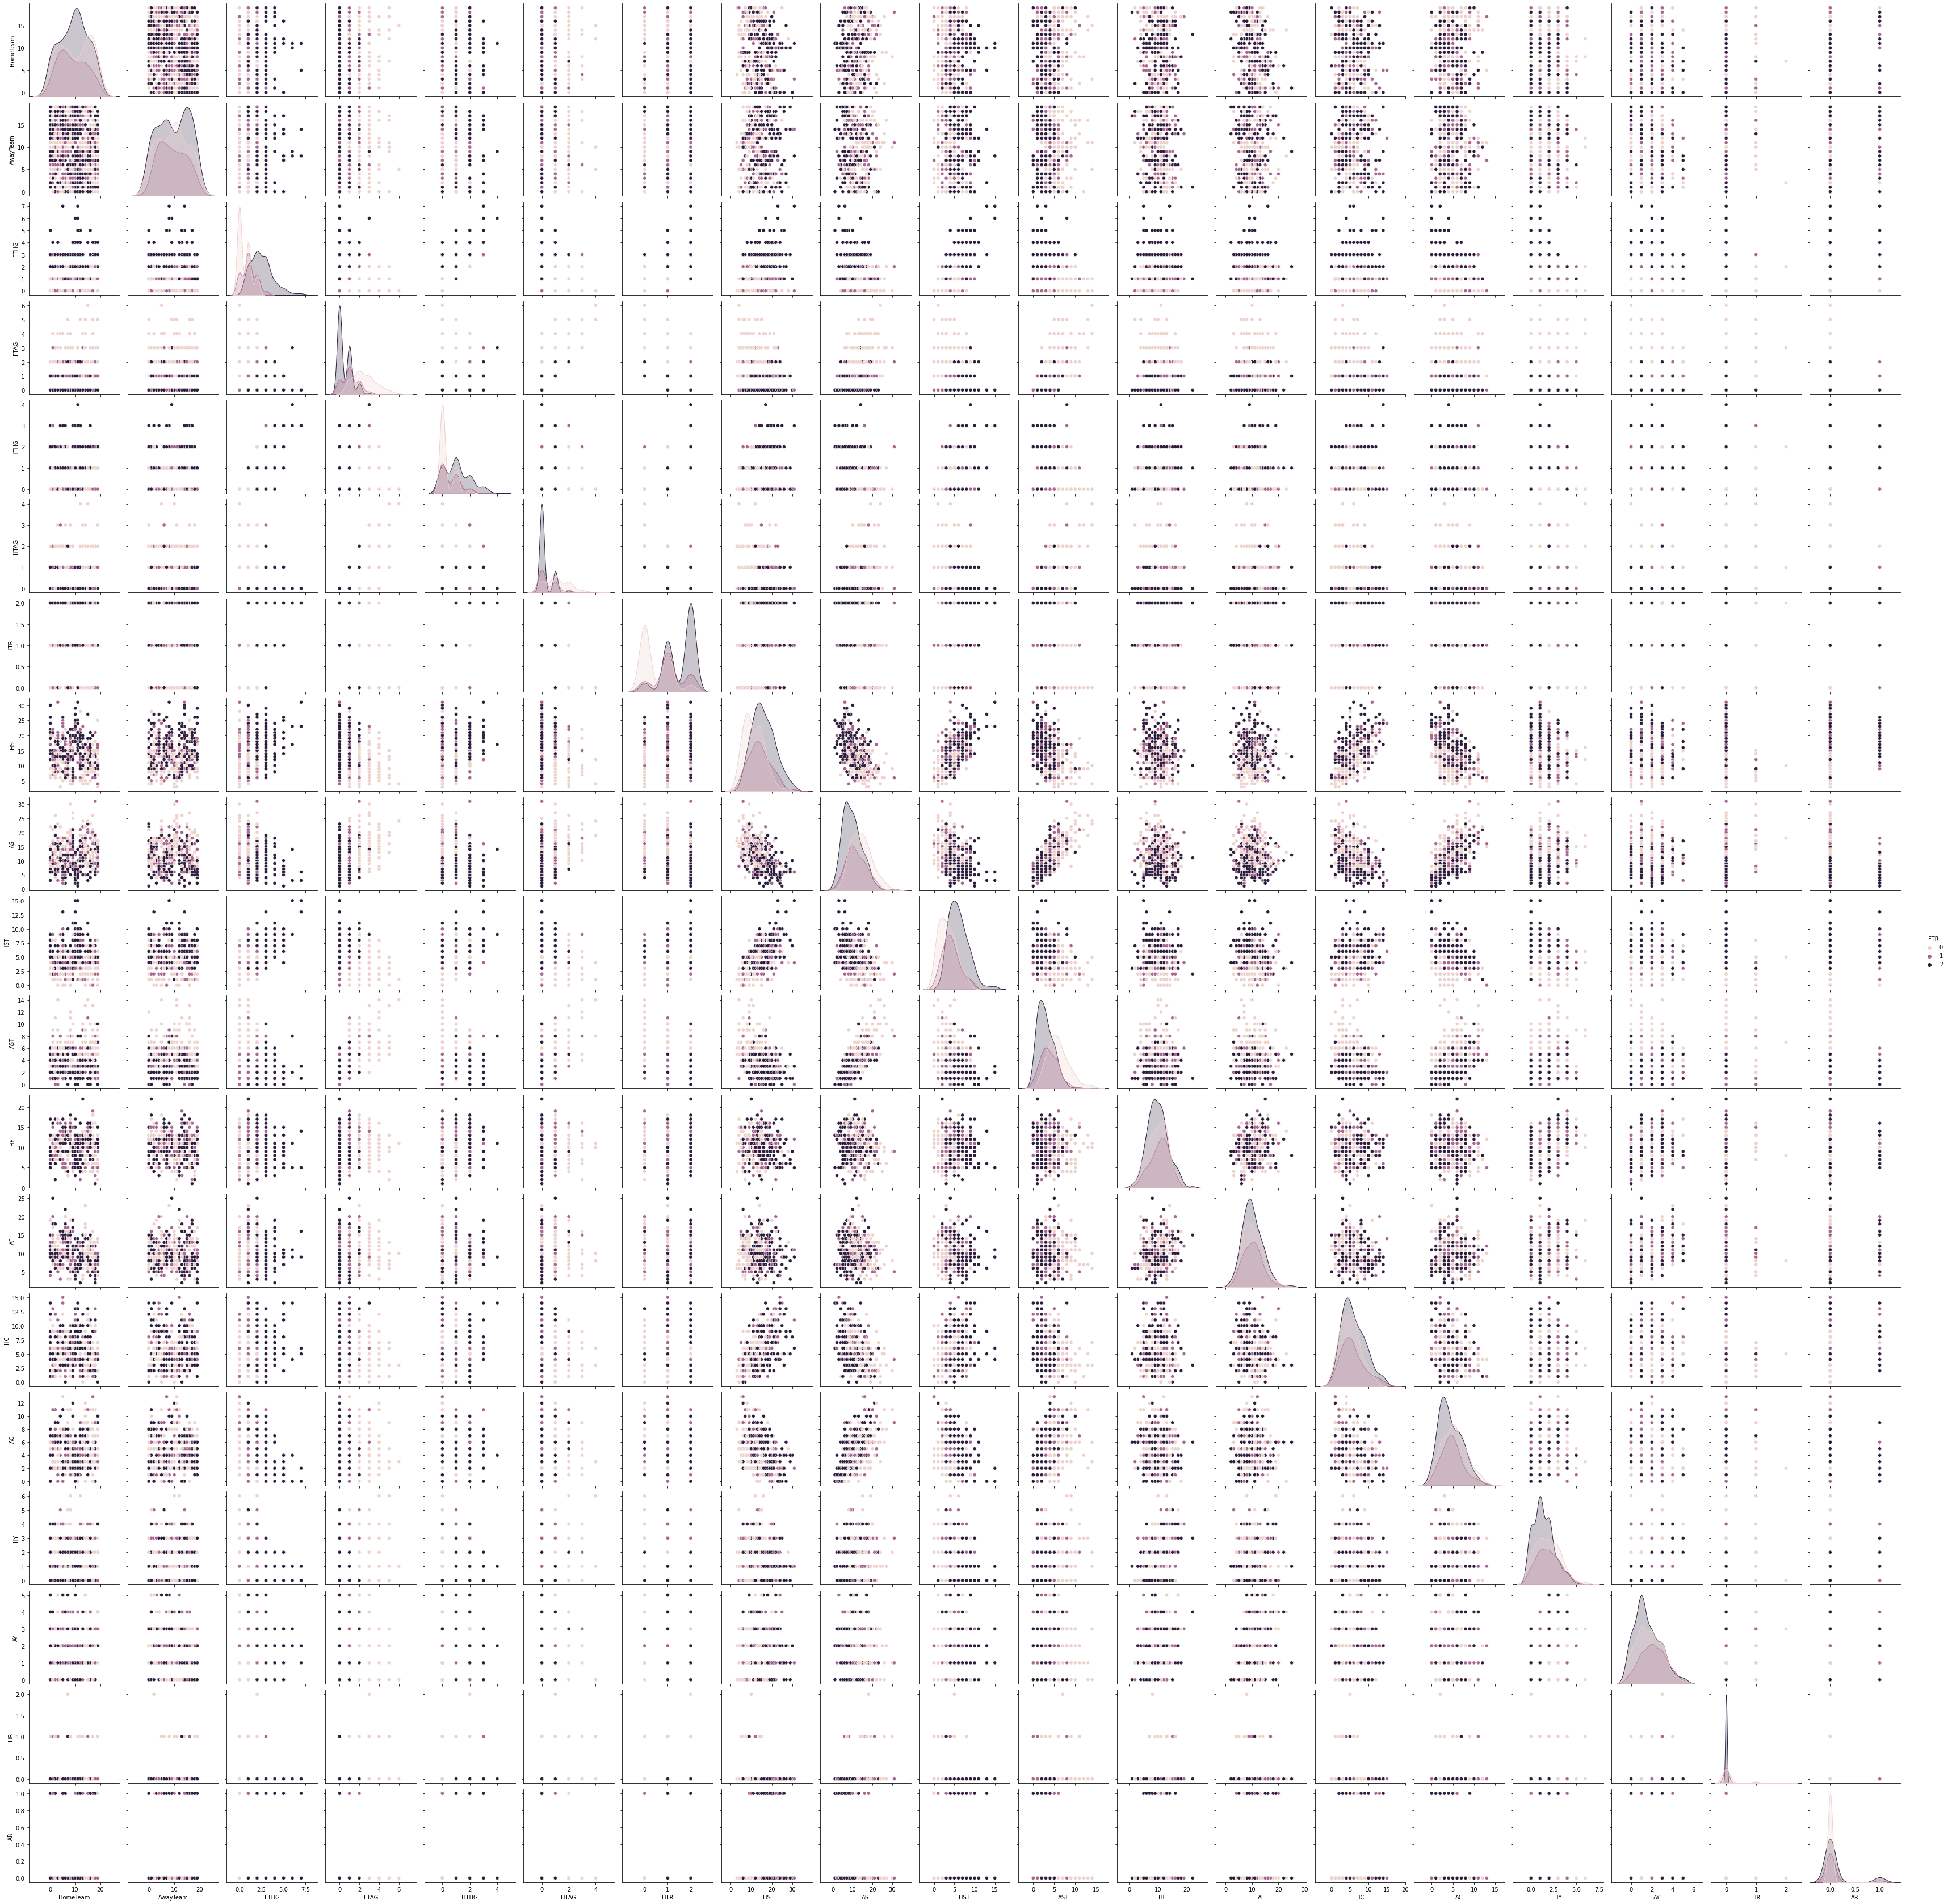

In [24]:
# Split the data into training and testing sets
X = data.drop('FTR', axis=1)
y = data['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the models to train
models = [
    ('Logistic Regression', LogisticRegression(random_state=42,max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC(random_state=42))
]

# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Convert results to dataframe
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)


                     Model  Accuracy
0      Logistic Regression  1.000000
1            Decision Tree  0.991228
2            Random Forest  0.921053
3      K-Nearest Neighbors  0.605263
4  Support Vector Machines  0.640351


In [27]:
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

In [28]:
results_df

Model  Accuracy
0      Logistic Regression  1.000000
1            Decision Tree  0.991228
2            Random Forest  0.921053
4  Support Vector Machines  0.640351
3      K-Nearest Neighbors  0.605263

In [ ]:
# Logistic Regression has the highest accuracy score of 1.0

In [30]:
# so we will use Logistic Regression for our prediction
# Train the logistic regression model
logreg = LogisticRegression(random_state=42,max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:


# Predict the outcome of a match
def predict_match(home_team, away_team, match_data):
    home_team_encoded = le_teams.transform([home_team])[0]
    away_team_encoded = le_teams.transform([away_team])[0]
    match_data = [home_team_encoded] + [away_team_encoded] + match_data
    prediction = logreg.predict([match_data])
    probabilities = logreg.predict_proba([match_data])[0]
    outcome = le_results.inverse_transform(prediction)[0]
    
    print(f"Prediction for the match between {home_team} and {away_team}: {outcome}")
    print(f"Probability of {home_team} winning: {probabilities[2] * 100:.2f}%")
    print(f"Probability of a draw: {probabilities[1] * 100:.2f}%")
    print(f"Probability of {away_team} winning: {probabilities[0] * 100:.2f}%")

# Predict the outcome of a match
home_team = 'Brentford'
away_team = 'Arsenal'
match_data = [2, 0, 1, 0, 2, 8, 22, 3, 4, 12, 8, 2, 5, 0, 0, 0, 0]  # Replace with match data
predict_match(home_team, away_team, match_data)


Prediction for the match between Brentford and Arsenal: H
Probability of Brentford winning: 98.62%
Probability of a draw: 1.38%
Probability of Arsenal winning: 0.00%


c:\Users\JINEF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\JINEF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
# Export The Trained Model
import joblib
joblib.dump(logreg, 'model.pkl')


['model.pkl']